In [1]:
import fpec.rxn_network as rn

import matplotlib.pyplot as plt

### `fpechem` usage examples
This notebook briefly walks through two example use cases of fpechem, one for a generic homogeneous thermochemical reaction, and another for a heterogeneous electrochemical one.
The input files are included in the `examples` directory.

For the first example, we look at a generic pair of reactions:
- 2[A] + [B] -> 2[C]
- [C] + [A] -> [D]

After specifying reactions energies and barriers, plus initial concentrations, in the input file, the mass balances can be initialized, solved, and plotted.

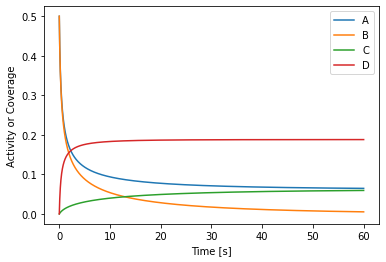

In [2]:
abcd_species, abcd_network = rn.create_network('ABCD.txt') # parse input file and establish individual reactions
abcd_coupled = rn.CoupledReactions(abcd_network) # initialize mass balances and stage the reaction network
abcd_coupled.solve() # integrate mass balances and deliver solution
abcd_coupled.plot_results() # quickly plot results

The second example is an electrochemical reaction, where the reaction energies and barriers are potential dependent.
This is a fictitious hydrogen evolution reaction that follows a Volmer adsorption and Tafel coupling mechanism:
- [H+] + e- + [*] -> [H*]
- 2[H*] -> [H2] + 2[*]

It is critical to supply charge transfer coefficients for the energies and barriers of each reaction (respectively `dedu` and `dbdu`).
In addition, the initial potential and a scan rate for the voltammetric trace must be supplied.
Entering an initial potential (e.g. `U = xyz`) is what enables `fpechem` to run in electrochemical mode.


In [3]:
# parse input file and establish individual reactions
vt1_species, vt1_network = rn.create_network('vt1_her.txt') 

# parse input file and establish individual reactions
# tmax and dt are the timescale and resolution of the integration, these can be changed to fit the problem
vt1_coupled = rn.CoupledReactions(vt1_network,tmax=1000,dt=5) 

# integrate mass balances and deliver solution
vt1_coupled.solve( )# integrate mass balances and deliver solution

vt2_species, vt2_network = rn.create_network('vt2_her.txt')
vt2_coupled = rn.CoupledReactions(vt2_network,tmax=1000,dt=5)
vt2_coupled.solve()

vt3_species, vt3_network = rn.create_network('vt3_her.txt')
vt3_coupled = rn.CoupledReactions(vt3_network,tmax=1000,dt=5)
vt3_coupled.solve()

For comparison to experiment, current vs. potential information is more useful than concentration vs. time (which is the standard output of the microkinetic model).
The next cell gives an example of how to us the `potential` and `tafel` methods to extract the electrochemically-relevant information from the raw microkinetic output.

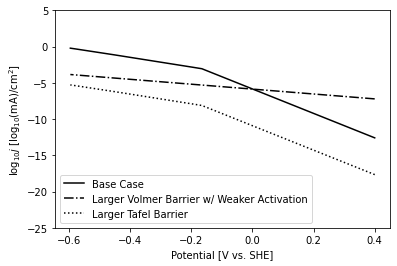

In [4]:
plt.plot(vt1_coupled.potential()[:-1],vt1_coupled.tafel(idx='H2'),color='k',linestyle='-',label='Base Case')
plt.plot(vt2_coupled.potential()[:-1],vt2_coupled.tafel(idx='H2'),color='k',linestyle='-.',label='Larger Volmer Barrier w/ Weaker Activation')
plt.plot(vt3_coupled.potential()[:-1],vt3_coupled.tafel(idx='H2'),color='k',linestyle=':',label='Larger Tafel Barrier')
plt.legend()
plt.ylim(-25,5)
plt.xlabel('Potential [V vs. SHE]')
plt.ylabel('log$_{10}j$ [log$_{10}$(mA)/cm$^2$]')
plt.show()